In [7]:
import pandas as pd
df = pd.read_csv("babies.csv")
df

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0
...,...,...,...,...,...,...,...,...
1231,1232,113,275.0,1,27.0,60.0,100.0,0.0
1232,1233,128,265.0,0,24.0,67.0,120.0,0.0
1233,1234,130,291.0,0,30.0,65.0,150.0,1.0
1234,1235,125,281.0,1,21.0,65.0,110.0,0.0


In [8]:
df.describe()

,case,bwt,gestation,parity,age,height,weight,smoke
count,1236.000000,1236.000000,1223.000000,1236.000000,1234.000000,1214.000000,1200.000000,1226.000000
mean,618.500000,119.576861,279.338512,0.254854,27.255267,64.047776,128.625833,0.394780
std,356.946775,18.236452,16.027693,0.435956,5.781405,2.533409,20.971862,0.489003
min,1.000000,55.000000,148.000000,0.000000,15.000000,53.000000,87.000000,0.000000
25%,309.750000,108.750000,272.000000,0.000000,23.000000,62.000000,114.750000,0.000000
50%,618.500000,120.000000,280.000000,0.000000,26.000000,64.000000,125.000000,0.000000
75%,927.250000,131.000000,288.000000,1.000000,31.000000,66.000000,139.000000,1.000000
max,1236.000000,176.000000,353.000000,1.000000,45.000000,72.000000,250.000000,1.000000


In [9]:
df.isnull().sum()

case          0
bwt           0
gestation    13
parity        0
age           2
height       22
weight       36
smoke        10
dtype: int64

In [10]:
df.dropna(inplace=True)
df.isnull().sum()

case         0
bwt          0
gestation    0
parity       0
age          0
height       0
weight       0
smoke        0
dtype: int64

In [11]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [12]:
import matplotlib.pyplot as plt
df.columns

Index(['case', 'bwt', 'gestation', 'parity', 'age', 'height', 'weight',
       'smoke'],
      dtype='object')

In [13]:
df.drop(columns=["case"],inplace=True)


In [14]:
df.columns

Index(['bwt', 'gestation', 'parity', 'age', 'height', 'weight', 'smoke'], dtype='object')

Text(0.5, 1.0, 'weight - gestation plot')

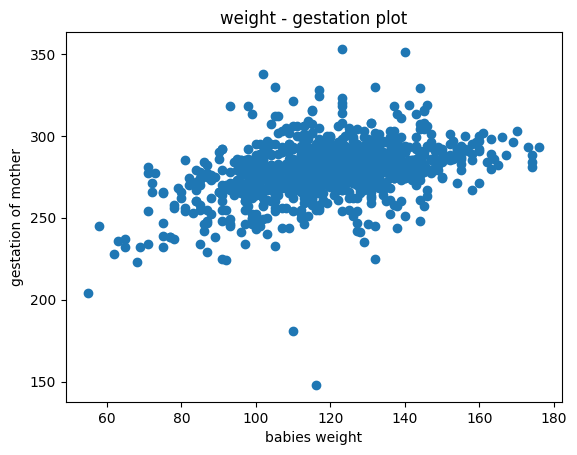

In [15]:
plt.scatter(df["bwt"],df["gestation"])
plt.xlabel("babies weight")
plt.ylabel("gestation of mother")
plt.title("weight - gestation plot")

In [16]:
## correlation of data
df.corr()

,bwt,gestation,parity,age,height,weight,smoke
bwt,1.000000,0.407543,-0.043908,0.026983,0.203704,0.155923,-0.246800
gestation,0.407543,1.000000,0.080916,-0.053425,0.070470,0.023655,-0.060267
parity,-0.043908,0.080916,1.000000,-0.351041,0.043543,-0.096362,-0.009599
age,0.026983,-0.053425,-0.351041,1.000000,-0.006453,0.147322,-0.067772
height,0.203704,0.070470,0.043543,-0.006453,1.000000,0.435287,0.017507
weight,0.155923,0.023655,-0.096362,0.147322,0.435287,1.000000,-0.060281
smoke,-0.246800,-0.060267,-0.009599,-0.067772,0.017507,-0.060281,1.000000


In [17]:
## Splitting the data into X and Y

y = df["bwt"]
x = df.iloc[:,1:]
x.head()

,gestation,parity,age,height,weight,smoke
0,284.0,0,27.0,62.0,100.0,0.0
1,282.0,0,33.0,64.0,135.0,0.0
2,279.0,0,28.0,64.0,115.0,1.0
4,282.0,0,23.0,67.0,125.0,1.0
5,286.0,0,25.0,62.0,93.0,0.0


In [18]:
## train test spilt using scikit-learn

from sklearn.model_selection import train_test_split as tts

x_train , x_test , y_train , y_test = tts(x,y,test_size=0.20)

In [19]:
x_test

,gestation,parity,age,height,weight,smoke
669,275.0,1,20.0,68.0,145.0,0.0
599,263.0,1,25.0,63.0,107.0,0.0
237,276.0,0,23.0,63.0,120.0,0.0
1071,268.0,0,32.0,62.0,97.0,1.0
728,254.0,0,23.0,62.0,157.0,0.0
...,...,...,...,...,...,...
800,273.0,0,29.0,68.0,130.0,0.0
527,290.0,0,26.0,66.0,125.0,0.0
1119,270.0,0,23.0,58.0,115.0,0.0
909,273.0,1,27.0,59.0,115.0,0.0


In [20]:
from sklearn.linear_model import LinearRegression, Lasso , Ridge

lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()

In [21]:
lr.fit(x_train,y_train)
lasso.fit(x_train,y_train)
ridge.fit(x_train,y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [22]:
lr_pred = lr.predict(x_test)
lasso_pred = lasso.predict(x_test)
ridge_pred = ridge.predict(x_test)

In [23]:
## model evaluation

from sklearn.metrics import r2_score, mean_squared_error

lr_rscore = r2_score(y_test,lr_pred)
las_rscore = r2_score(y_test,lasso_pred)
rid_rscore = r2_score(y_test,ridge_pred)

lr_mse = mean_squared_error(y_test,lr_pred)
las_mse = mean_squared_error(y_test,lasso_pred)
rid_mse = mean_squared_error(y_test,ridge_pred)

In [24]:
print("\nPerformance of Linear Regression Model :")
print("R2score : ",lr_rscore)
print("mse : ",lr_mse)

print("\nPerformance of Lasso Regression Model :")
print("R2score : ",las_rscore)
print("mse : ",las_mse)

print("\nPerformance of Ridge Regression Model :")
print("R2score : ",rid_rscore)
print("mse : ",rid_mse)


Performance of Linear Regression Model :
R2score :  0.13746258761422447
mse :  260.05937961555804

Performance of Lasso Regression Model :
R2score :  0.13712597969009122
mse :  260.16086860219997

Performance of Ridge Regression Model :
R2score :  0.13759710166409678
mse :  260.0188229511664


In [25]:
## saving model into pickel form

## saving linear regression

import pickle

with open("model/model.pkl",'wb') as f:
    pickle.dump(lr,f)

In [26]:
## load the pickle file

with open("model/model.pkl",'rb') as obj:
    mymodel =  pickle.load(obj)

In [27]:
x_train.head()

,gestation,parity,age,height,weight,smoke
1024,248.0,0,30.0,70.0,145.0,0.0
1003,278.0,0,37.0,68.0,114.0,0.0
1205,266.0,0,29.0,64.0,113.0,0.0
1217,319.0,0,28.0,66.0,145.0,0.0
219,274.0,0,22.0,65.0,130.0,1.0


In [29]:
test_data = {
    "gestation":[248.0],
    "parity":[0],
    "age":[30.0],
    "height":[70.0],
    "weight":[145.0],
    "smoke":[0.0]
}

In [31]:
test_df = pd.DataFrame(test_data)
test_df

,gestation,parity,age,height,weight,smoke
0,248.0,0,30.0,70.0,145.0,0.0


In [32]:
mymodel.predict(test_df)

array([117.8483323])

In [33]:
df

,bwt,gestation,parity,age,height,weight,smoke
0,120,284.0,0,27.0,62.0,100.0,0.0
1,113,282.0,0,33.0,64.0,135.0,0.0
2,128,279.0,0,28.0,64.0,115.0,1.0
4,108,282.0,0,23.0,67.0,125.0,1.0
5,136,286.0,0,25.0,62.0,93.0,0.0
...,...,...,...,...,...,...,...
1231,113,275.0,1,27.0,60.0,100.0,0.0
1232,128,265.0,0,24.0,67.0,120.0,0.0
1233,130,291.0,0,30.0,65.0,150.0,1.0
1234,125,281.0,1,21.0,65.0,110.0,0.0
